In [32]:
import numpy as np
import pandas as pd
file = []
for num in range(0,2200,200):
    data2 = np.loadtxt('/Users/sholafolarin/Desktop/DOT_FILES/Field10k_Dot/Field_{}_10k/VectFieldX'.format(num))
    file.append(data2)


In [33]:
lst =[]
r = []
m = []

for i in range(0,11,1):
    df = pd.DataFrame(file[i], columns = ['x','y','z','ux','uy','uz','lm'])
    df = df.drop(columns = 'lm')
    df['ux_m'] = df['ux'] - df['ux'].mean()
    df['uy_m'] = df['uy'] - df['uy'].mean()
    df['uz_m'] = df['uz'] - df['uz'].mean()
    df_a = df[['x','y','z']]
    df_b = df[['ux_m', 'uy_m','uz_m']]
    a = df_a.to_numpy()
    b = df_b.to_numpy()
    r.append(a)
    m.append(b)
    cross = np.cross(a,b) 
    lst.append(cross)
    
    


In [35]:
result = np.zeros((11,3))
for i in range(3):
    for j in range(11):
        result[j,i] = np.mean(lst[j][:,i])
         


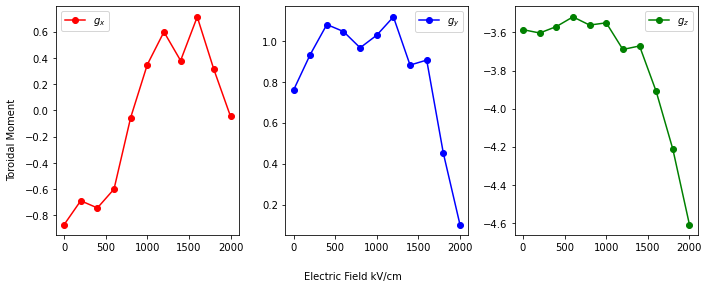

In [36]:
from matplotlib import pyplot as plt
nrow =1
ncol = 3
fig,ax = plt.subplots(nrow, ncol, figsize = (10,4))
E = np.arange(0,2200,200)
labels = ['$g_x$', '$g_y$', '$g_z$']
colors = ['r','b', 'green']
for i, a in enumerate(ax.flatten()):
    a.plot(E, result[:,i], '-o', label=labels[i], color=colors[i])
    a.legend()
    
    a.legend()
    fig.tight_layout()
    fig.supxlabel('Electric Field kV/cm', fontsize =10)
    fig.supylabel('Toroidal Moment', fontsize =10)
